Epoch 1/10


/usr/lib/python3.13/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5117 - loss: 0.6961
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7437 - loss: 0.6184 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7447 - loss: 0.4957 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7578 - loss: 0.4018 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7767 - loss: 0.3725 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7342 - loss: 0.3739 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7344 - loss: 0.3589 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 0.3524 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7309 - loss: 0.3634 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7355 - loss: 0.3551 
32/32 - 0s - 8ms/step - accuracy: 0.7500 - loss: 0.3588
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accura

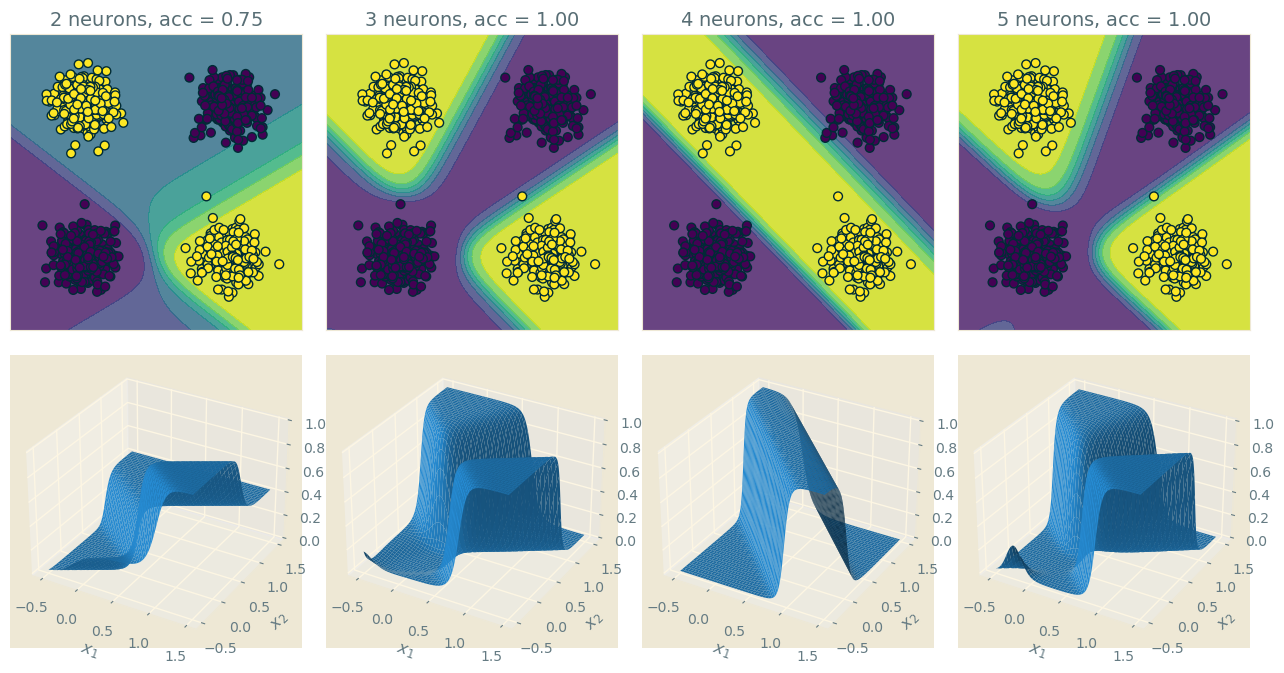

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

np.random.seed(1)

X_xor = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
y_xor = np.array([0, 1, 1, 0])  # 异或数据集

X, y, m = X_xor, y_xor, 255
cov = [[0.01, 0], [0, 0.01]]  # 高斯分布的协方差矩阵

# 以异或的4个点为中心 从2维高斯分布中各随机采样255个样本
for (xx, yy) in zip(X_xor, y_xor):
    x1, x2 = np.random.multivariate_normal(xx, cov, m).T
    X = np.r_[X, np.column_stack((x1, x2))]
    y = np.hstack((y, np.ones(m) * yy))

figure = plt.figure(figsize=(16, 8))

with plt.style.context('Solarize_Light2'):

    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    inc = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, inc), np.arange(y_min, y_max, inc))
    i = 0
    h_array = [2, 3, 4, 5]
    col = len(h_array)

    for h in h_array:

        model = Sequential()
        model.add(Dense(units=h, activation="sigmoid", input_shape=(2, )))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer=Adam(0.1), loss="binary_crossentropy", metrics=['accuracy'])

        model.fit(X, y, epochs=10, batch_size=32)
        loss, acc = model.evaluate(X, y, verbose=2)

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:, 0].reshape(xx.shape)

        i += 1
        ax = plt.subplot(2, col, i)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        ax.contourf(xx, yy, Z, alpha=.8)
        # contours = ax.contour(xx, yy, Z, np.arange(-0.1, 1.1, 0.1), alpha=.8)
        # ax.clabel(contours)

        ax.scatter(X[:, 0], X[:, 1], s=40, c=y, edgecolors='#002b36')
        # ax.text((xx.min()+xx.max())/2, yy.min()+0.05, (r'$%d$ neurons, acc = %.2f' % (h, acc)).lstrip('0'), size=14, color='#002b36', horizontalalignment='center')
        ax.set_title(r'$%d$ neurons, acc = %.2f' % (h, acc), color='#586e75', size=14)

        ax = plt.subplot(2, col, i + col, projection='3d')

        ax.plot_surface(xx, yy, Z)
        ax.set_xticks(np.arange(x_min, x_max + 0.1, 0.5))
        ax.set_yticks(np.arange(y_min, y_max + 0.1, 0.5))
        ax.set_xlabel(r'$x_1$')
        ax.set_ylabel(r'$x_2$')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
plt.show()